In [115]:
import cv2
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
def charger_images(chemin_dossier):
    Images=[]
    for filesnames in os.listdir(chemin_dossier):
        fichier=os.path.join(chemin_dossier,filesnames)
        img=cv2.imread(fichier)
        img=cv2.resize(img,(50,50))
        img=img[:,:,1]
        Images.append(img)
    return np.array(Images)

In [117]:
bel=charger_images("C:\\Users\\fred\\DL\\computer vision\\Face Recognition System\\Face Recognition System\\images\\bel")
elon=charger_images("C:\\Users\\fred\\DL\\computer vision\\Face Recognition System\\Face Recognition System\\images\\elon")
fredy=charger_images("C:\\Users\\fred\\DL\\computer vision\\Face Recognition System\\Face Recognition System\\images\\fredy")
kevin=charger_images("C:\\Users\\fred\\DL\\computer vision\\Face Recognition System\\Face Recognition System\\images\\kevin")
sadio=charger_images("C:\\Users\\fred\\DL\\computer vision\\Face Recognition System\\Face Recognition System\\images\\sadio")
tacha=charger_images("C:\\Users\\fred\\DL\\computer vision\\Face Recognition System\\Face Recognition System\\images\\tacha")

In [118]:
bel_label=np.zeros(bel.shape[0])
elon_label=np.ones(elon.shape[0])
tacha_label=np.full((tacha.shape[0],),2)
kevin_label=np.full((kevin.shape[0],),3)
sadio_label=np.full((sadio.shape[0],),4)
fredy_label=np.full((fredy.shape[0],),5)

In [119]:
liste=[bel,elon,tacha,kevin,sadio,fredy]
i=2
images=np.concatenate((liste[0],liste[1]),axis=0)
while i < len(liste)-1:
    images=np.concatenate((images,liste[i+1]),axis=0)
    i=i+1

In [120]:
images.shape


(2420, 50, 50)

In [121]:
liste=[bel_label,elon_label,tacha_label,kevin_label,sadio_label,fredy_label]
i=2
labels=np.concatenate((liste[0],liste[1]),axis=0)
while i < len(liste)-1:
    labels=np.concatenate((labels,liste[i+1]),axis=0)
    i=i+1

In [122]:
index=np.arange(labels.shape[0])
np.random.shuffle(index)
images=images[index]
labels=labels[index]

In [123]:
np.unique(labels)

array([0., 1., 3., 4., 5.])

In [124]:
def classe_images(label):
    if label==0:
        return "Jude"
    elif label==1:
        return "Elon"
    elif label==2:
        return "Natacha"
    elif label==3:
        return "Kevin"
    elif label==4:
        return "Sadio"
    elif label==5:
        return "Fredy"
    

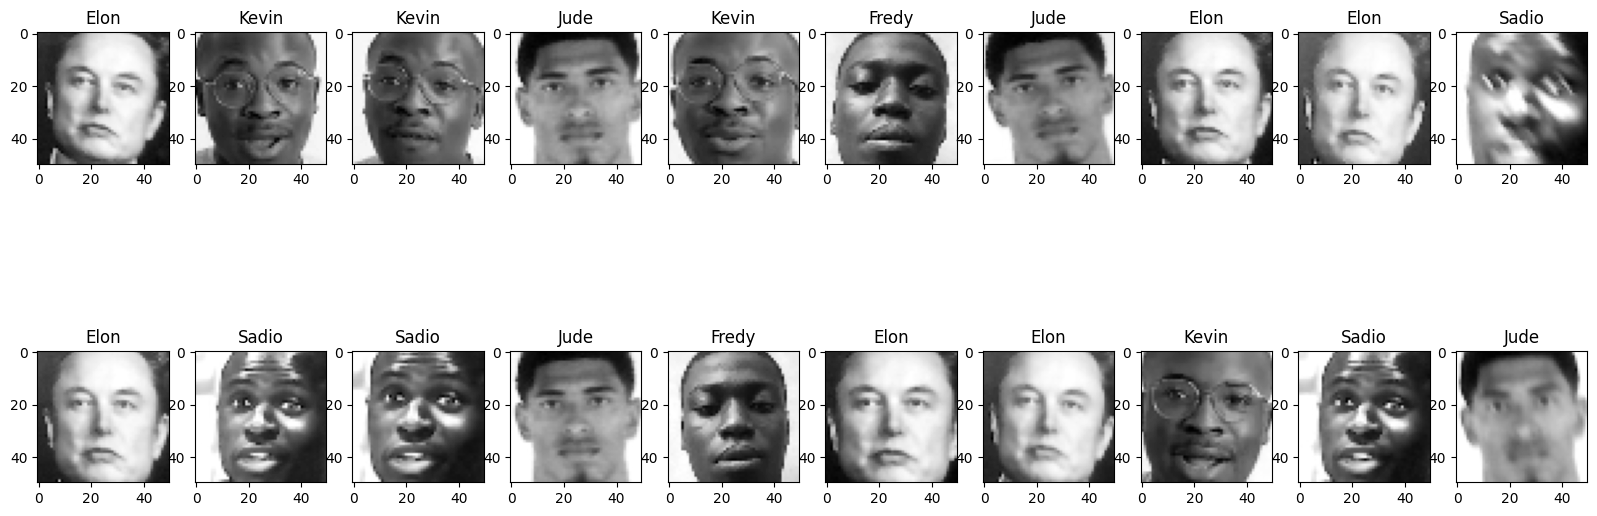

In [125]:
import random
plt.figure(figsize=(20,20))
for i in range(20):
    j=random.randint(0,images.shape[0])
    plt.subplot(5,10,i+1)
    plt.imshow(images[j],"gray")
    plt.title(classe_images(labels[j]))


In [126]:

images[0]


array([[228, 228, 228, ..., 234, 234, 234],
       [228, 228, 228, ..., 234, 234, 234],
       [228, 228, 228, ..., 234, 234, 234],
       ...,
       [227, 227, 227, ..., 172, 161, 160],
       [226, 226, 227, ..., 193, 189, 184],
       [226, 226, 227, ..., 200, 197, 191]], dtype=uint8)

In [127]:
images=images/255

In [128]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(images,labels,test_size=0.20,random_state=0)

In [129]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Conv2D,MaxPooling2D,Flatten

In [130]:
model=Sequential()


In [131]:
model.add(Conv2D(256,(3,3),input_shape=(50,50,1)))
model.add(MaxPooling2D(2,2))
model.add(Activation("relu"))
model.add(Conv2D(256,(3,3),input_shape=(50,50,1)))
model.add(MaxPooling2D(2,2))
model.add(Activation("relu"))



In [132]:
model.add(Flatten())


In [133]:
model.add(Dense(12))
model.add(Activation("relu"))
model.add(Dense(6))
model.add(Activation("softmax"))


In [134]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["sparse_categorical_accuracy"])

In [135]:
history1=model.fit(X_train,y_train,epochs=30)

Epoch 1/30
61/61 [==============================] - 41s 658ms/step - loss: 0.4184 - sparse_categorical_accuracy: 0.8197
Epoch 2/30
61/61 [==============================] - 40s 652ms/step - loss: 0.0517 - sparse_categorical_accuracy: 0.9881
Epoch 3/30
61/61 [==============================] - 40s 648ms/step - loss: 0.0081 - sparse_categorical_accuracy: 0.9990
Epoch 4/30
61/61 [==============================] - 39s 645ms/step - loss: 0.0023 - sparse_categorical_accuracy: 0.9990
Epoch 5/30
61/61 [==============================] - 34s 564ms/step - loss: 2.7229e-04 - sparse_categorical_accuracy: 1.0000
Epoch 6/30
61/61 [==============================] - 35s 566ms/step - loss: 1.4807e-04 - sparse_categorical_accuracy: 1.0000
Epoch 7/30
61/61 [==============================] - 35s 577ms/step - loss: 1.0384e-04 - sparse_categorical_accuracy: 1.0000
Epoch 8/30
61/61 [==============================] - 38s 631ms/step - loss: 7.7795e-05 - sparse_categorical_accuracy: 1.0000
Epoch 9/30
61/61 [======

In [136]:
model.evaluate(X_test,y_test)

16/16 [==============================] - 3s 172ms/step - loss: 0.0031 - sparse_categorical_accuracy: 0.9979


[0.0031345102470368147, 0.9979338645935059]

1/1 [==============================] - 0s 30ms/step


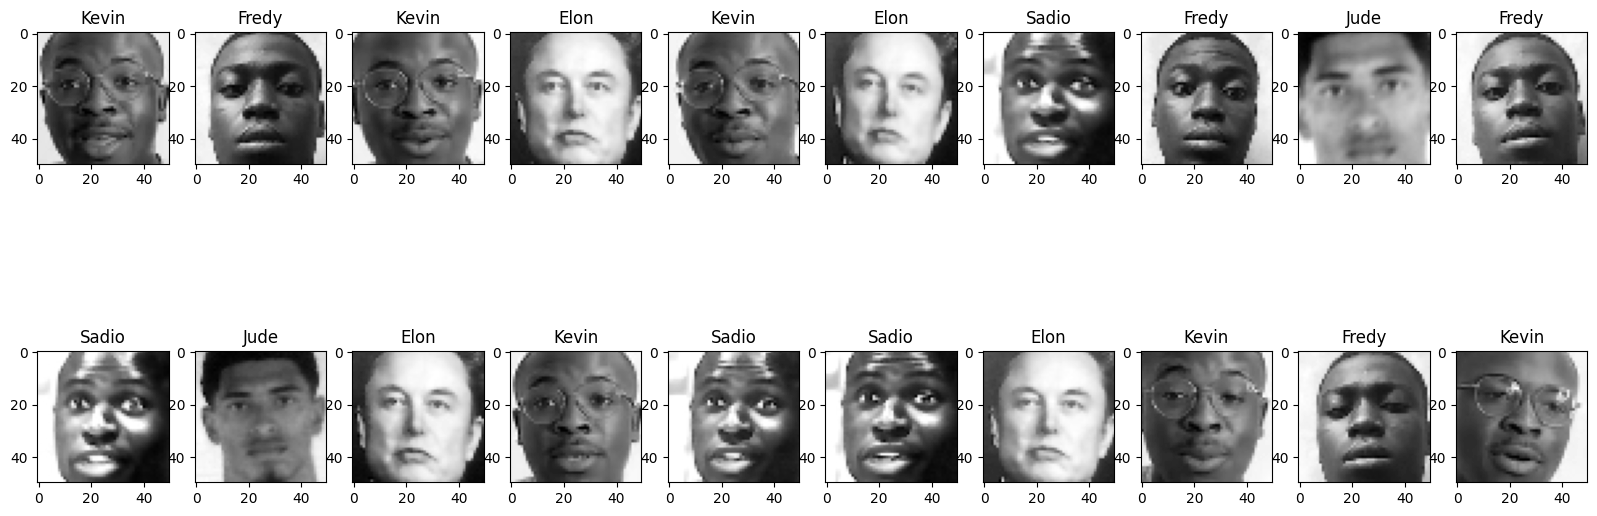

In [137]:
import random
plt.figure(figsize=(20,20))
for i in range(20):
    j=random.randint(0,X_test.shape[0])
    plt.subplot(5,10,i+1)
    plt.imshow(X_test[j],"gray")
    predicted_label=np.argmax(model.predict(X_test[j].reshape(1,50,50,1)))
    plt.title(classe_images(predicted_label))

In [138]:
model.save("model_multiclassesV1.h5")